## the perfomance of our trained model is shown in this file


In [39]:
from google.colab import drive
import os

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.


In [41]:
import cv2
import pytesseract
import numpy as np
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import re

In [42]:
!pip install transformers torch torchvision Pillow datasets

In [43]:
from PIL import Image
from torch.nn.utils.rnn import pad_sequence
import torch

## the texts are first detected from the images by pytesseract then they are passed to the finetuned model

In [44]:
image_path = "/content/drive/MyDrive/human_ai_folder/testing_folder/Mendo-page_5.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [45]:
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

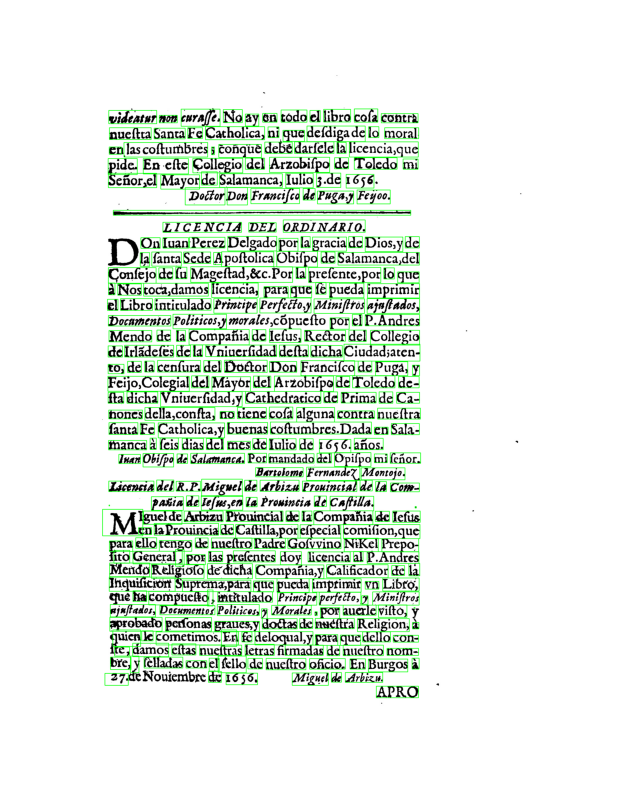

In [46]:
for i in range(len(data['text'])):
    if int(data['conf'][i]) > 0:  # Ignore low-confidence detections
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Show the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [47]:
!pip install difflib

ERROR: Could not find a version that satisfies the requirement difflib (from versions: none)
ERROR: No matching distribution found for difflib


In [48]:
from transformers import TrOCRProcessor, VisionEncoderDecoderModel

# Load the processor and model
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-printed")

# Ensure model is on GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)
print(device)
# Check model structure
print(model)

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

cpu
VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
          

In [49]:
from torch.utils.data import Dataset
from transformers import VisionEncoderDecoderModel, TrOCRProcessor
from PIL import Image
import torch

# Specify the path to the latest/best checkpoint
checkpoint_path = "/content/drive/MyDrive/human_ai_folder/ocr_model/checkpoint-124"  # Change this to the latest checkpoint

# Load the fine-tuned model
model = VisionEncoderDecoderModel.from_pretrained(checkpoint_path)
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-printed")

# Ensure model is in evaluation mode
model.eval()

Config of the encoder: <class 'transformers.models.vit.modeling_vit.ViTModel'> is overwritten by shared encoder config: ViTConfig {
  "attention_probs_dropout_prob": 0.0,
  "encoder_stride": 16,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_size": 768,
  "image_size": 384,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "model_type": "vit",
  "num_attention_heads": 12,
  "num_channels": 3,
  "num_hidden_layers": 12,
  "patch_size": 16,
  "pooler_act": "tanh",
  "pooler_output_size": 768,
  "qkv_bias": false,
  "torch_dtype": "float32",
  "transformers_version": "4.50.0"
}

Config of the decoder: <class 'transformers.models.trocr.modeling_trocr.TrOCRForCausalLM'> is overwritten by shared decoder config: TrOCRConfig {
  "activation_dropout": 0.0,
  "activation_function": "gelu",
  "add_cross_attention": true,
  "attention_dropout": 0.0,
  "bos_token_id": 0,
  "classifier_dropout": 0.0,
  "cross_attention_hidden_size": 768,
  "d_mod

VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (i

In [50]:
# Function to perform OCR on an image
def process_text_regions(image, data):
    extracted_text = ""

    for i in range(len(data['text'])):
        text = data['text'][i].strip()
        if text:
            x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
            cropped_region = image[y:y+h, x:x+w]
            pil_img = Image.fromarray(cropped_region).convert("RGB")

            # Process with TrOCR
            pixel_values = processor(pil_img, return_tensors="pt").pixel_values
            generated_ids = model.generate(pixel_values)
            decoded_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

            extracted_text += decoded_text + " "

    return extracted_text

# Extract and recognize text
final_text = process_text_regions(gray, data)
print("Extracted Text:")
print(final_text)

The channel dimension is ambiguous. Got image shape (3, 5, 3). Assuming channels are the first dimension.


Extracted Text:
VIDEATUR mor CHARAGE. NO AY ON TODO EL LIBRO COTA CONTRA NUEITTA SANTA FE CATHOLICA, DI QUE DEEDIGADE 10 MORAL CR LAS COFTURBERS : CONQUE DEBE DARFELE IA LICENCLA,QUE DIDE. EN EFFE COLLEGIO DEL ARZOLIPO DE TOLEDO MI SERIOR,EL MAYOR DE SALAMANCA, DULIO 3.DE 1656 DOCTOR DON FRANCIFCO DE PWGA,Y FEYOO. LICENCIA DEL ORDINARIO. ON LUAN PEREZ DELGADO POR LA GRACIA DE DIOS,Y DE LA FANTA SEDE A POFTOLICA OBIFPO DE SALAMANCA,DEL CONTEJO DE fu MAGETTAD,&C.POR LA PRECENTE, POR IO QUE 1 NOS TOCA,DAMOS LICENCIA, PARA QUE TE PUEDA IMPRIMIR EL LIBRO INTICULARO PRINCIPE PERFETTO,Y MINIFROS AJAftADOS, DOCMMENOS POLITICOS,Y MORALES, COPUEFFO POR EL P.ANDRES MENDO DE LA COMPANIA DE LEFUS, RECTOR DEL COLLEGIO DC IRIZLEGES DE 1 VINIUERRIAD DEFTA DICHA CLUDADJATEN- TO, DE 1A CENTURA DEL DOCTOR DON FRANCIFCO DE PUGA, Y FEIJO,COLEGIAL DEL MAYOR DEL ARZOBIFPO DE TOLEDO DE- TA DICHA VINIUERFIDAD, Y CATBEDRACICO DE PRIMA DE CA- HONES DELIA,CONFRA, NO TIENE COFA ALGUNA CONTA MUELRA FANTA FE CATHOLI

In [51]:
  def normalize_text(text):
        """Apply historical OCR normalization rules"""
        text = text.replace("ſ", "s")  # Long 's' → 's'
        text = text.replace("ç", "z")  # ç → z
        text = text.replace("q̄", "que")  # q-macron → que
        text = text.replace("u", "v") if "v" in text else text.replace("v", "u")  # u ↔ v
        text = text.translate(str.maketrans("áéíóú", "aeiou"))  # Remove accents (except ñ)
        return text

In [52]:
transcript_path = "/content/drive/MyDrive/human_ai_folder/testing_folder/page5.txt"
with open(transcript_path, "r", encoding="utf-8") as f:
    ground_truth_text = f.read().strip()


ground_truth_text=normalize_text(ground_truth_text)

In [53]:
print("\nGround Truth Transcript:\n", ground_truth_text)


Ground Truth Transcript:
 videatvr no cvrasse. No hay en todo el libro cosa contra
nvestra Santa Fe Catholica, ni qve desdiga de lo moral
en las costvmbres; conqve debe darsele la licencia, qve
pide. En este Collegio del Arzobispo de Toledo mi
Señor, el Mayor de Salamanca, Ivlio 3. de 1656.
Doctor Don Francisco de Pvga, y Feijoo.
LICENCIA DEL ORDINARIO.
Don Ivan Perez Delgado por la gracia de Dios, y de
la santa Sede Apostolica Obispo de Salamanca, del
Consejo de sv Magestad, &c. Por la presente, por lo qve
a Nos toca, damos licencia, para qve se pveda imprimir
el Libro intitvlado Principe Perfecto, y Ministros adjvstados,
Docvmentos Politicos, y morales, conpvesto por el P. Andres
Mendo de la Compañia de Iesvs, Rector del Collegio
de Irlandeses de la Vniversidad desta dicha Civdad; aten-
to, de la censvra del Doctor Don Francisco de Pvga, y
Feijo, Colegial del Mayor del Arzobispo de Toledo de-
sta dicha Vniversidad, y Cathedratico de Prima de Ca-
nones della, consta, no tiene cosa al

In [54]:
!pip install spacy
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 49.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [55]:
import re
import spacy

# Load Spanish NLP model for sentence and proper noun detection
nlp = spacy.load("es_core_news_sm")

def correct_case(text):
    # Convert everything to lowercase
    text = text.lower()

    # Process text using spaCy for sentence detection
    doc = nlp(text)

    # Capitalize the first letter of each sentence
    corrected_text = " ".join(
        [sent.text.capitalize() for sent in doc.sents]
    )

    return corrected_text

# Example usage
extracted_text = final_text  # Your OCR output
clean_text = correct_case(extracted_text)
print(clean_text)

Videatur mor charage. No ay on todo el libro cota contra nueitta santa fe catholica, di que deedigade 10 moral cr las cofturbers : conque debe darfele ia licencla,que dide. En effe collegio del arzolipo de toledo mi serior,el mayor de salamanca, dulio 3.de 1656 doctor don francifco de pwga,y feyoo. Licencia del ordinario. On luan perez delgado por la gracia de dios,y de la fanta sede a poftolica obifpo de salamanca,del contejo de fu magettad,&c.por la precente, por io que 1 nos toca,damos licencia, para que te pueda imprimir el libro inticularo principe perfetto,y minifros ajaftados, docmmenos politicos,y morales, copueffo por el p.andres mendo de la compania de lefus, rector del collegio dc irizleges de 1 viniuerriad defta dicha cludadjaten- to, de 1a centura del doctor don francifco de puga, y feijo,colegial del mayor del arzobifpo de toledo de- ta dicha viniuerfidad, y catbedracico de prima de ca- hones delia,confra, no tiene cofa alguna conta muelra fanta fe catholica, y buenas cof

In [56]:
!pip install Levenshtein jiwer

## the error rates are shown here

In [57]:
import pytesseract
import cv2
import Levenshtein
from jiwer import wer

cer = Levenshtein.distance(clean_text, ground_truth_text) / max(len(ground_truth_text), 1)
wer_value = wer(ground_truth_text, clean_text)
print(f"\nCER (Character Error Rate): {cer:.4f}")
print(f"WER (Word Error Rate): {wer_value:.4f}")


CER (Character Error Rate): 0.2427
WER (Word Error Rate): 0.7857


In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score
from difflib import SequenceMatcher

def character_f1(ground_truth, ocr_text):
    # Normalize text (lowercase, strip spaces)
    ground_truth = ground_truth.lower().replace(" ", "")
    ocr_text = ocr_text.lower().replace(" ", "")

    # Create binary vectors (character presence)
    char_set = set(ground_truth) | set(ocr_text)
    gt_vector = [1 if c in ground_truth else 0 for c in char_set]
    ocr_vector = [1 if c in ocr_text else 0 for c in char_set]

    # Compute F1-score
    f1 = f1_score(gt_vector, ocr_vector, average='binary')
    return f1

# Example usage
ground_truth_text = ground_truth_text
ocr_text = clean_text

f1_char = character_f1(ground_truth_text, ocr_text)
print("Character-Level F1-score:", f1_char)


Character-Level F1-score: 0.8461538461538461


In [59]:
from sklearn.metrics import precision_score, recall_score, f1_score
from collections import Counter

def word_f1(ground_truth, ocr_text):
    # Convert to lowercase and split into words
    gt_words = ground_truth.lower().split()
    ocr_words = ocr_text.lower().split()

    # Count words
    gt_counter = Counter(gt_words)
    ocr_counter = Counter(ocr_words)

    # Compute precision and recall
    common_words = sum((gt_counter & ocr_counter).values())
    precision = common_words / sum(ocr_counter.values()) if sum(ocr_counter.values()) > 0 else 0
    recall = common_words / sum(gt_counter.values()) if sum(gt_counter.values()) > 0 else 0

    # Compute F1-score
    if precision + recall == 0:
        return 0  # Avoid division by zero
    f1 = 2 * (precision * recall) / (precision + recall)
    return f1

# Example usage
f1_word = word_f1(ground_truth_text, ocr_text)
print("Word-Level F1-score:", f1_word)

Word-Level F1-score: 0.45037037037037037


In [60]:
image_path = "/content/drive/MyDrive/human_ai_folder/processed_images/Buendia-page_1.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [61]:
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

In [62]:
final_text = process_text_regions(gray, data)
print("Extracted Text:")
print(final_text)

Extracted Text:
ICS PER VOS : DULCISIMO NINO : 3 1 JESUS : QUE NO TOLO OS : GSTRA 3 DIGNAFEIS DE LLAMARDS DOCTOR DE LOS NINOS, 1 INO TAMBIEN DE AISIF- CIR COMO NINO ENTRE LOS DOCTORES, TE CONFAGRA HUMILDE ETTA PEQUENA INSTRUCTION DE LOS NINOS. ES AISI, QUE ELLA TAMBIEN TE DIRICE 2 LA JU- VENTUD : PERO AEFTA, COMO RECUER- DO DE 10 QUE APRENDIO, ALOS NI- NOS > COMO PRECIFA EXPLICACION DE 10 QUE DEBEN EFTUDIAR. POR EFTE TO- IO TITULO.ES MUY VUEFRA > Y POR TER PARA NINOS , QUE CONFAIS 2 LA EDUCACION DE VUEFRA COMPANIA, 10 CS MUCHO MAS. EN VOS, ( DIVI- NO EXEMPLAR DE TODAS LAS VIRTU- DES ) ) TIENEN ABREVIADO CL MAS TE- 


In [63]:
extracted_text = final_text  # Your OCR output
clean_text = correct_case(extracted_text)
print(clean_text)

Ics per vos : dulcisimo nino : 3 1 jesus : que no tolo os : gstra 3 dignafeis de llamards doctor de los ninos, 1 ino tambien de aisif- cir como nino entre los doctores, te confagra humilde etta pequena instruction de los ninos. Es aisi, que ella tambien te dirice 2 la ju- ventud : pero aefta, como recuer- do de 10 que aprendio, alos ni- nos > como precifa explicacion de 10 que deben eftudiar. Por efte to- io titulo.es muy vuefra > y por ter para ninos , que confais 2 la educacion de vuefra compania, 10 cs mucho mas. En vos, ( divi- no exemplar de todas las virtu- des ) ) tienen abreviado cl mas te-


In [64]:
transcript_path = "/content/drive/MyDrive/human_ai_folder/testing_folder/page5.txt"
with open(transcript_path, "r", encoding="utf-8") as f:
    ground_truth_text = f.read().strip()


ground_truth_text=normalize_text(ground_truth_text)
print(ground_truth_text)

videatvr no cvrasse. No hay en todo el libro cosa contra
nvestra Santa Fe Catholica, ni qve desdiga de lo moral
en las costvmbres; conqve debe darsele la licencia, qve
pide. En este Collegio del Arzobispo de Toledo mi
Señor, el Mayor de Salamanca, Ivlio 3. de 1656.
Doctor Don Francisco de Pvga, y Feijoo.
LICENCIA DEL ORDINARIO.
Don Ivan Perez Delgado por la gracia de Dios, y de
la santa Sede Apostolica Obispo de Salamanca, del
Consejo de sv Magestad, &c. Por la presente, por lo qve
a Nos toca, damos licencia, para qve se pveda imprimir
el Libro intitvlado Principe Perfecto, y Ministros adjvstados,
Docvmentos Politicos, y morales, conpvesto por el P. Andres
Mendo de la Compañia de Iesvs, Rector del Collegio
de Irlandeses de la Vniversidad desta dicha Civdad; aten-
to, de la censvra del Doctor Don Francisco de Pvga, y
Feijo, Colegial del Mayor del Arzobispo de Toledo de-
sta dicha Vniversidad, y Cathedratico de Prima de Ca-
nones della, consta, no tiene cosa algvna contra nvestra
santa F

In [65]:
print(f"\nCER (Character Error Rate): {cer:.4f}")
print(f"WER (Word Error Rate): {wer_value:.4f}")


CER (Character Error Rate): 0.2427
WER (Word Error Rate): 0.7857


In [66]:
f1_char = character_f1(ground_truth_text, ocr_text)
print("Character-Level F1-score:", f1_char)

Character-Level F1-score: 0.8461538461538461


In [67]:

# Example usage
f1_word = word_f1(ground_truth_text, ocr_text)
print("Word-Level F1-score:", f1_word)


Word-Level F1-score: 0.45037037037037037


In [68]:
image_path = "/content/drive/MyDrive/human_ai_folder/testing_folder/Mendo-page_4.jpg"
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [69]:
data = pytesseract.image_to_data(gray, output_type=pytesseract.Output.DICT)

In [70]:
final_text = process_text_regions(gray, data)
print("Extracted Text:")
print(final_text)

Extracted Text:
RIEDAD DEL AFUMPTO,VIAUDOLE GRAUE,Y ONDEROFO,FIN UC IE ENCUMBRE LA AFETACION : QUE CS ALAJA MILY ETHIMABLE DC LA PRUDENCIA, QUE LA PLUMA POR 0 MAS REMONTADA GO- UICTHE CUS BUELOS AL PEFO DE LAS MATERIAS. UANTOS CO- NOCCEN AL AUTOR,LE BAN OYPO FACEQUENTEMERE EN 109 PUL- DITOS, Y LE BAN VENERADO CON EL PRIMER CREDITO CN CFTE EXERCICIO,CON GUE TABLEN 1 LINEA,A QUE ILEGA FU ELOGUEN- CIA,NUMCA INFERIOR ALA DE TULIO,Y DEMOTHENES.LA VILI- LIDAD DEL LIBRO TE CONOCE DEL KN,QUE POR EL TE PRETENCE. SU ENTERNZA CS LA IDEA DE VIN PRINCIPE PERFETO, Y GEN- OD EFFE O ALMA > 0- CABEZA DEL CUERPO DE LA REPUBLICAS BIEN TE DEJA ENTENDER,QUAN BENIGNAS INFUECIAS CAUFARA FU'VIRUD CN LAS COFTUMBERS DE BUS VARALLOS 1 Y QUANTQ MEJOR OBRARAN EFTOSADUERTIDOS DE FU EXEMPLO.COM QUE. BALLARAN EN ERTA OBRA LOS PRINCIPES, QUE APRENDER, Y 2 LOS. VAFALLOS,QUEIMITARY TODOS MADTA ENTERNZA CHRIFILA - NA,Y POLITICA CONDUCE,PARA 656 SOUERNAR, Y OBEDECER. ARDUA EMPREFA ES,AMIMAR LOS OJOS A- ESFERA TAN SUPERIOR

In [71]:
extracted_text = final_text  # Your OCR output
clean_text = correct_case(extracted_text)
print(clean_text)

Riedad del afumpto,viaudole graue,y onderofo,fin uc ie encumbre la afetacion : que cs alaja mily ethimable dc la prudencia, que la pluma por 0 mas remontada go- uicthe cus buelos al pefo de las materias. Uantos co- noccen al autor,le ban oypo facequentemere en 109 pul- ditos, y le ban venerado con el primer credito cn cfte exercicio,con gue tablen 1 linea,a que ilega fu eloguen- cia,numca inferior ala de tulio,y demothenes.la vili- lidad del libro te conoce del kn,que por el te pretence. Su enternza cs la idea de vin principe perfeto, y gen- od effe o alma > 0- cabeza del cuerpo de la republicas bien te deja entender,quan benignas infuecias caufara fu'virud cn las coftumbers de bus varallos 1 y quantq mejor obraran eftosaduertidos de fu exemplo.com que. Ballaran en erta obra los principes, que aprender, y 2 los. Vafallos,queimitary todos madta enternza chrifila - na,y politica conduce,para 656 souernar, y obedecer. Ardua emprefa es,amimar los ojos a- esfera tan superior, como la de vd 

In [72]:
transcript_path = "/content/drive/MyDrive/human_ai_folder/testing_folder/page5.txt"
with open(transcript_path, "r", encoding="utf-8") as f:
    ground_truth_text = f.read().strip()


ground_truth_text=normalize_text(ground_truth_text)

In [73]:
print(f"\nCER (Character Error Rate): {cer:.4f}")
print(f"WER (Word Error Rate): {wer_value:.4f}")


CER (Character Error Rate): 0.2427
WER (Word Error Rate): 0.7857


In [74]:
f1_char = character_f1(ground_truth_text, ocr_text)
print("Character-Level F1-score:", f1_char)

Character-Level F1-score: 0.8461538461538461


In [75]:
f1_word = word_f1(ground_truth_text, ocr_text)
print("Word-Level F1-score:", f1_word)

Word-Level F1-score: 0.45037037037037037
